In [41]:
import email
import numpy as np
import os

def f(s):
    return s.strip().lower()

def string_helper(s):
    start = 0
    c = s[start]
    while start < len(s):
        c = s[start]
        if c.lower() != c.upper():
            break
        else:
            start += 1
    end = len(s)-1
    c = s[end]
    while end > -1:
        c = s[end]
        if c.lower() != c.upper():
            break
        else:
            end -= 1
    return s[start:end+1]

def get_actual(mail):
    l1 = list(mail['To'].split(','))
    l1 = list(map(f, l1))
    if mail['Cc'] != None:
        l2 = list(map(f, list(mail['Cc'].split(','))))
        l1+=l2
    l1 = list(map(string_helper, l1))
    return l1

def email_id_parser(id):
    id = id.strip()
    l = list(id.split(' '))
    index = -1
    for i in range(len(l)):
        if '@' in l[i]:
            index = i
            break
    if index == 0:
        ans = l[0].split('@')[0]
    elif index > 0:
        ans = ''
        for i in range(index):
            ans += l[i] + ' '
    else:
        return None
    return ans.strip().lower()

def parse_gm_list(file_text):
    ids = []
    for id in file_text:
        id = email_id_parser(id)
        ids.append(id)
    return ids


'linux-kernel'

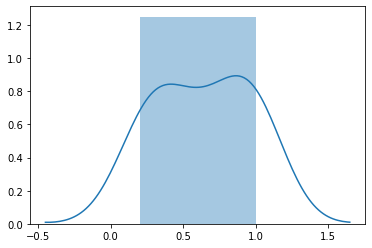

In [57]:
actual_sents = []
percents = []
this_file_path = os.path.abspath('.')

for i in range(1, 11):
    text = open(f'{this_file_path}/patches/patch{i}.patch', 'r').read()
    mail = email.message_from_string(text)
    actual_sent = get_actual(mail)
    s = set(actual_sent)
    gm_list = parse_gm_list(open(f'{this_file_path}/gm-ans/patch{i}.patch.ans').readlines())
    s = s.intersection(set(gm_list))
    percents.append(len(s)/len(gm_list))
    actual_sents += actual_sent

import seaborn as sns
from matplotlib import pyplot as plt

ax = sns.distplot(percents)
plt.show()

In [58]:
cnt = dict()

for i in actual_sents:
    if i in cnt:
        cnt[i] += 1
    else:
        cnt[i] = 1

print(sorted(cnt.items(), key = lambda kv: kv[1], reverse=True))

[('linux-kernel', 8), ('linux-arm-kernel', 3), ('rob herring', 2), ('devicetree', 2), ('linux-usb', 2), ('alexander a. klimov', 2), ('linux-sunxi', 1), ('ondrej jirman', 1), ('vasily khoruzhick', 1), ('yangtao li', 1), ('zhang rui', 1), ('daniel lezcano', 1), ('amit kucheria', 1), ('maxime ripard', 1), ('chen-yu tsai', 1), ('open list:allwinner thermal driver', 1), ('moderated list:arm/allwinner sunxi soc support', 1), ('open list', 1), ('geert uytterhoeven', 1), ('magnus damm', 1), ('michael turquette', 1), ('stephen boyd', 1), ('linus walleij', 1), ('philipp zabel', 1), ('linux-renesas-soc', 1), ('linux-clk', 1), ('linux-gpio', 1), ('prabhakar', 1), ('lad prabhakar', 1), ('joro', 1), ('hch', 1), ('iommu', 1), ('jonathan.lemon', 1), ('linux-pci', 1), ('baolu.lu', 1), ('dwmw', 1), ('patrick delaunay', 1), ('alexandre torgue', 1), ('manivannan sadhasivam', 1), ('maxime coquelin', 1), ('linux-stm', 1), ('linux-spi', 1), ('marek szyprowski', 1), ('linux-samsung-soc', 1), ('mark brown', 1)

NameError: name '__file__' is not defined